# Final Project

## Introduction

Heart disease is a major cause of death globally. According to https://www.cdc.gov, in 2020, around 697,000 people died from heart disease in the US. Half of those deaths are caused by Coronary Artery Disease. Coronary artery disease is caused when major blood vessels struggle to send oxygen, blood and nutrients to the heart because of cholestrol deposits in the arteries. Cholestrol deposits can block arteries and reduce the blood flow to the heart which causes chest pains and shortness of breath. A complete blockage can trigger a heart attack. Every year, around 805,000 people in the US have a heart attack.

For this final project, I'm using Heart Attack Dataset from Kaggle. The link is https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset. The original source of the dataset is from the University of California Irvine's Machine Learning Repository - https://archive.ics.uci.edu/ml/datasets/Heart+Disease. The objective is to predict risk of heart attack based on the given attributes of a patient, using unsupervised machine learning. 

When assessing a patient's risk for heart attack, there are several factors to consider such as age, sex, chest pain type, resting blood pressure, cholesterol and more. A machine learning algorithm can help detect patterns and more accurately predict heart disease risk that will save lives of patients.

#### Dataset Description from UCI

There are 14 variables.

1. Age : Age of the patient
2. Sex : Sex of the patient (1 = Male, 0 = Female)
3. cp : Chest Pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
4. trtbps : resting blood pressure (in mm Hg)
5. chol: cholesterol in mg/dl fetched via BMI sensor
6. fbs: (fasting blood sugar > 120 mg/dl)
    - 1 = true
    - 0 = false
7. restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalachh: maximum heart rate achieved
9. exng: exercise induced angina
    - 1 = yes
    - 0 = no
10. old peak: ST depression induced by exercise relative to rest
11. slp: the slope of the peak exercise ST segment
    - 1 = unsloping
    - 2 = flat
    - 3 = downsloping
12. caa: number of major vessels (0-3) colored by fluoroscopy
13. thall : Thallium Stress Test (Results of the blood flow observed via the radioactive dye)
    - 2 = normal (normal blood flow)
    - 1 = fixed defect (no blood flow in some part of the heart)
    - 3 = reversible defect (a blood flow is observed but it is not normal)
14. output: diagnosis of heart disease (angiographic disease status)
    - 0: < 50% diameter narrowing. less chance of heart disease
    - 1: > 50% diameter narrowing. more chance of heart disease

There is some confusion whether thall means thalassemia or thallium stress test. Thalassemia is a blood disorder, while thallium stress test is used to find out the condition of blood flow while exercising or resting. I will assume that thal refers to thallium stress test.

*Citation: Reference #1*

## Stage 1: Data Cleaning, EDA and Preprocessing

In [1]:
# Loading libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data

heart_df = pd.read_csv("./heart.csv")

heart_df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
# Check data types

heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


All the features are recognized as numericals. This is misleading since most of them are categorical whose values have been mapped to numerical values to make analysis easier. 

- The numerical features are: **[age], [trtbps], [chol], [thalachh], [oldpeak]**
- The categorical features are: **[sex], [cp], [fbs], [restecg], [exng], [slp], [caa], [thall]**
- The target feature is: **[output]**

In [4]:
# Check if there are missing values in the data

heart_df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


According to the summary statistics, most attributes fall in the range of values that are described in the dataset description. 

However a few discrepancies are noted: 
1. The attribute **[caa]** should only take values between 0 and 3, however the data shows values between 0 and 4.
2. **[thall]** should be only take values of 3, 6, 7, but in the dataset it takes values betweem 0 and 3.
3. **[slp]** is expected to take values between 1 and 3, but it is shown to take values between 0 and 2.
4. **[cp]** is expected to take values between 1 and 4, but is mapped to values between 0 and 3.

According to the original data source from UCI, there are missing values in the dataset. These missing values have been represented as values outside the data description, according to https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/discussion/234843#1288712.



In [6]:
heart_df["caa"].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

Since there are only 5 entries that take the value '4', we will replace them with the most common occuring value which is 4. Since there's only a small number of missing values, replacing them won't make much of a difference in the analysis

In [7]:
# heart_df.drop(index = (heart_df[heart_df.caa == 4]).index, inplace = True)

heart_df["caa"] = heart_df["caa"].replace([4], 0)

heart_df["caa"].value_counts()

0    180
1     65
2     38
3     20
Name: caa, dtype: int64

In [8]:
heart_df["thall"].value_counts()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

There are 2 entries that take the value '0', so they can be replaced with the most common occurrence. Then, the labels will be remapped to the original labels (3, 6, 7).

*Citation: Reference #2*

In [9]:
#heart_df.drop(index = (heart_df[heart_df.thall == 0]).index, inplace = True)

heart_df["thall"] = heart_df["thall"].replace([0], 2)

heart_df["thall"].value_counts()

2    168
3    117
1     18
Name: thall, dtype: int64

In [10]:
heart_df["thall"] = heart_df["thall"].replace({2:3, 1:6, 3:7})

heart_df["thall"].value_counts()

3    168
7    117
6     18
Name: thall, dtype: int64

In [11]:
heart_df["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [12]:
heart_df["slp"].value_counts()

2    142
1    140
0     21
Name: slp, dtype: int64

Replacing labels of **[cp]** and **[slp]** to match the given data description.

In [13]:
heart_df["cp"] = heart_df["cp"].replace({0:4, 3:1, 1:2, 2:3})

heart_df["slp"] = heart_df["slp"].replace({0:3, 1:2, 2:1})

In [14]:
heart_df["cp"].value_counts()

4    143
3     87
2     50
1     23
Name: cp, dtype: int64

In [15]:
heart_df["slp"].value_counts()

1    142
2    140
3     21
Name: slp, dtype: int64

### Exploratory Data Analysis

For EDA purposes, we will change the labelling of data for better interpretation. In this section, we will see how each feature affects the output variable i.e., whether a patient has a high risk of heart attack or not.

In [16]:
heart_df_eda = heart_df.copy()

heart_df_eda

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,1,145,233,1,0,150,0,2.3,3,0,6,1
1,37,1,3,130,250,0,1,187,0,3.5,3,0,3,1
2,41,0,2,130,204,0,0,172,0,1.4,1,0,3,1
3,56,1,2,120,236,0,1,178,0,0.8,1,0,3,1
4,57,0,4,120,354,0,1,163,1,0.6,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,4,140,241,0,1,123,1,0.2,2,0,7,0
299,45,1,1,110,264,0,1,132,0,1.2,2,0,7,0
300,68,1,4,144,193,1,1,141,0,3.4,2,2,7,0
301,57,1,4,130,131,0,1,115,1,1.2,2,1,7,0


In [17]:
heart_df_eda['output'] = heart_df_eda.output.replace({1: "High Risk", 0: "Low Risk"})
heart_df_eda['sex'] = heart_df_eda.sex.replace({1: "Male", 0: "Female"})
heart_df_eda['cp'] = heart_df_eda.cp.replace({1: "typical_angina", 
                          2: "atypical_angina", 
                          3:"non-anginal pain",
                          4: "asymptomatic"})
heart_df_eda['restecg'] = heart_df_eda.restecg.replace({0: "normal", 
                          1: "ST-T wave abnormality", 
                          2:"left ventricular hypertrophy"})
heart_df_eda['exng'] = heart_df_eda.exng.replace({1: "Yes", 0: "No"})
heart_df_eda['fbs'] = heart_df_eda.fbs.replace({1: "True", 0: "False"})
heart_df_eda['slp'] = heart_df_eda.slp.replace({1: "upsloping", 2: "flat",3:"downsloping"})
heart_df_eda['thall'] = heart_df_eda.thall.replace({3: "normal", 6: "fixed_defect", 7:"reversable_defect"})

In [18]:
heart_df_eda.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Male,typical_angina,145,233,True,normal,150,No,2.3,downsloping,0,fixed_defect,High Risk
1,37,Male,non-anginal pain,130,250,False,ST-T wave abnormality,187,No,3.5,downsloping,0,normal,High Risk
2,41,Female,atypical_angina,130,204,False,normal,172,No,1.4,upsloping,0,normal,High Risk
3,56,Male,atypical_angina,120,236,False,ST-T wave abnormality,178,No,0.8,upsloping,0,normal,High Risk
4,57,Female,asymptomatic,120,354,False,ST-T wave abnormality,163,Yes,0.6,upsloping,0,normal,High Risk


#### Density Plot of Age Distribution

Text(0.5, 1.0, 'Age Distribution of Patients')

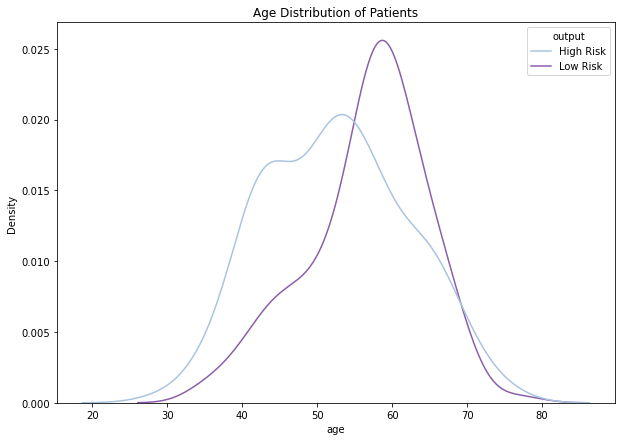

In [19]:
fig = plt.figure(figsize=(10,7))
sns.kdeplot(data = heart_df_eda, x = "age", hue = "output", palette="BuPu")
plt.title("Age Distribution of Patients")

**Observation:** Most patients are between the ages of 50 and 60. There's seems to be a higher risk of getting a heart attack between the ages 40 to 60 and a lower risk of getting a heart attack if the person is above the age 55.

#### Barplot of Gender with respect to Age

Text(0.5, 1.0, 'Gender Distribution of Age')

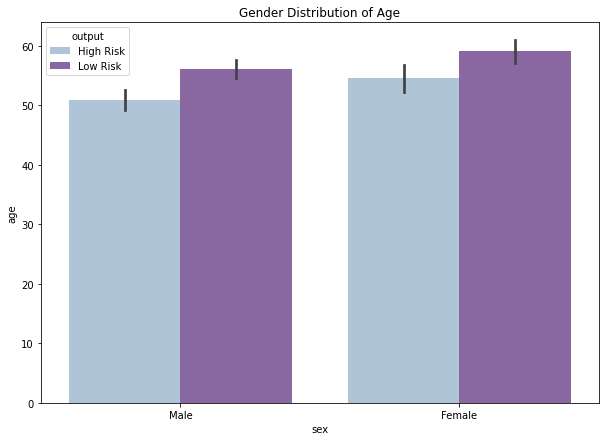

In [20]:
fig = plt.figure(figsize=(10,7))
sns.barplot(data = heart_df_eda, x = "sex", y = "age", hue = "output", palette = "BuPu")
plt.title("Gender Distribution of Age")

**Observation:** Older females have a slightly higher risk of getting a heart attack than older males. However, there doesn't seem to be any difference in which gender suffers more risk of getting a heart attack.

#### Categorical Distribution of Thall with respect to Age

Text(0.5, 1.0, 'Distribution of Thall w.r.t Age')

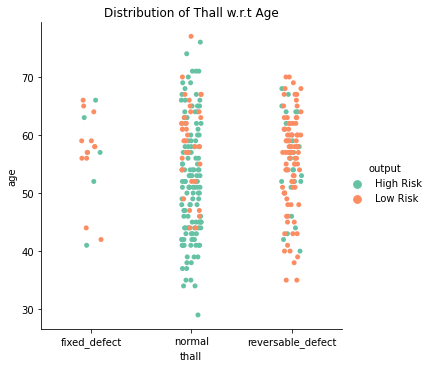

In [21]:
sns.catplot(
    data = heart_df_eda, x="thall", y="age", hue="output",
    palette = "Set2", zorder=1
)
plt.title("Distribution of Thall w.r.t Age")

**Observation:** Patients with normal blood flow have a higher risk of heart attack.

#### Categorical Distribution of  Resting ECG

Text(0.5, 1.0, 'Count of Resting ECG')

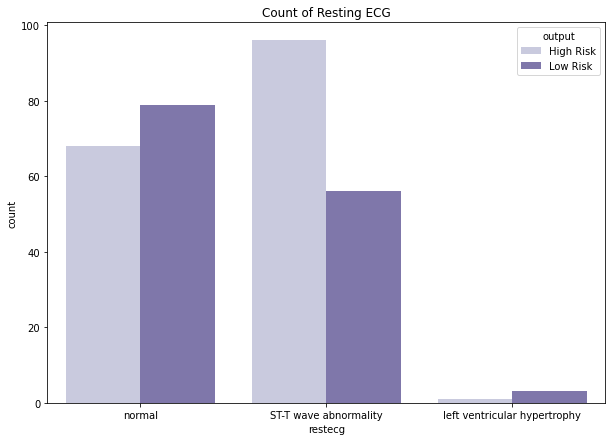

In [22]:
fig = plt.figure(figsize=(10,7))
ax = sns.countplot(data = heart_df_eda, x = "restecg", hue = "output", palette = "Purples")
sns.move_legend(ax, "upper right")
plt.title("Count of Resting ECG")

**Observation:** Patients with ST-T wave abnormality in the resting ecg have higher risk of heart attack.

#### Categorical Distribution of Exercise-induced Angina

Text(0.5, 1.0, 'Count of Exercise-Induced Angina')

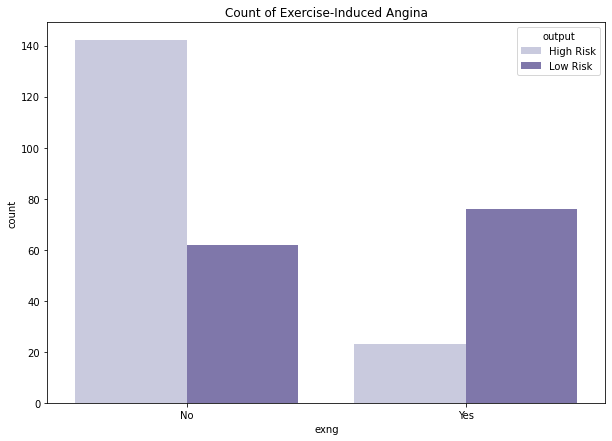

In [23]:
fig = plt.figure(figsize=(10,7))
ax = sns.countplot(data = heart_df_eda, x = "exng", hue = "output", palette = "Purples")
sns.move_legend(ax, "upper right")
plt.title("Count of Exercise-Induced Angina")

**Observation:** Most patients who have no exercise induced angina have a higher risk of heart attack.

#### Categorical Distribution of Chest Pain Type

Text(0.5, 1.0, 'Count of Chest Pain Type')

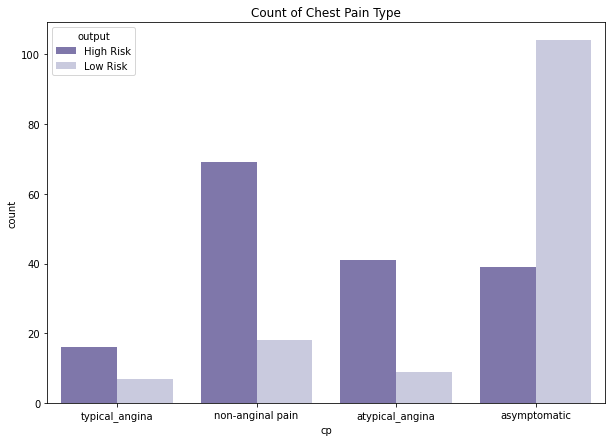

In [24]:
fig = plt.figure(figsize=(10,7))
ax = sns.countplot(data = heart_df_eda, x = "cp", hue = "output", palette = "Purples_r")
sns.move_legend(ax, "upper left")
plt.title("Count of Chest Pain Type")

**Observation:** If chest pain type is non-anginal, it indicates a high risk of heart attack.

#### Categorical Distributiont of Slope of Peak Exercise (ST segment)

Text(0.5, 1.0, 'Count of Slope')

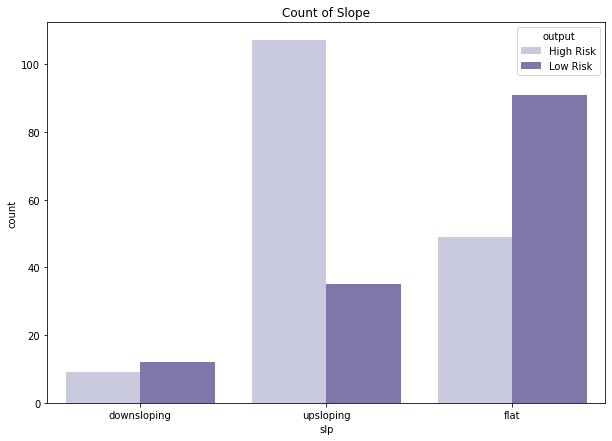

In [25]:
fig = plt.figure(figsize=(10,7))
sns.countplot(data = heart_df_eda, x = "slp", hue = "output", palette="Purples")
plt.title("Count of Slope")

**Observation:** If the slope of the peak exercise ST segment is upsloping, it indicates a high risk of heart attack.

#### Categorical Distribution of fasting blood sugar(>120 mg/dl)

Text(0.5, 1.0, 'Count of Fasting Blood Sugar')

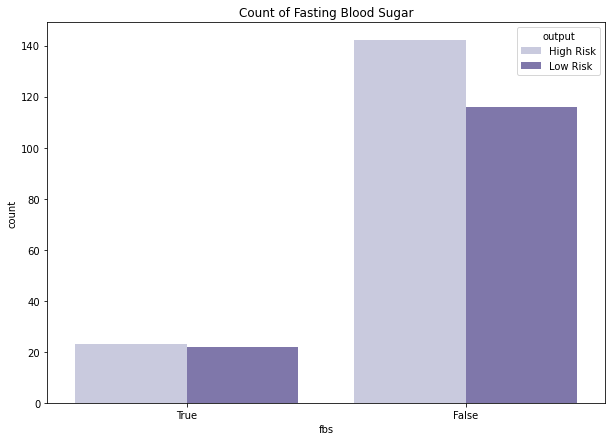

In [26]:
fig = plt.figure(figsize=(10,7))
sns.countplot(data = heart_df_eda, x = "fbs", hue = "output", palette="Purples")
plt.title("Count of Fasting Blood Sugar")

**Observations:** Patients who don't have a fasting blood sugar greater than 120 mg/dl have a higher chance of heart attack.

#### Cholestrol Plots

Text(0.5, 1.0, 'Distribution of Cholestrol')

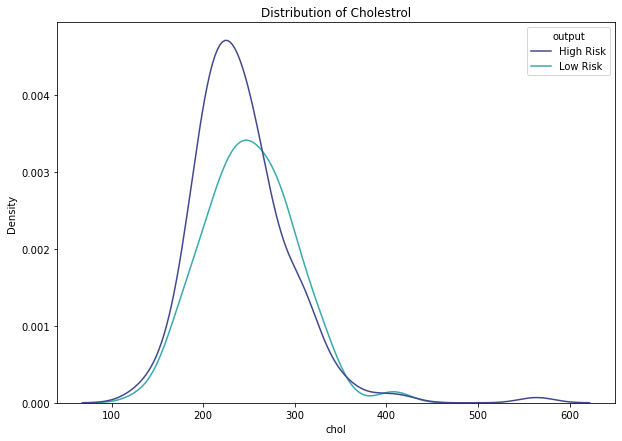

In [27]:
fig = plt.figure(figsize=(10,7))
sns.kdeplot(data = heart_df_eda, x = "chol", hue = "output", palette="mako")
plt.title("Distribution of Cholestrol")

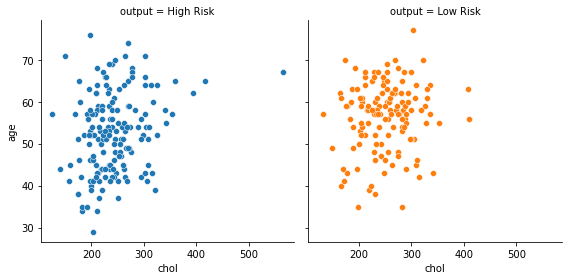

In [28]:
g = sns.FacetGrid(heart_df_eda, col="output", height = 4, hue = "output")
g.map(sns.scatterplot, "chol", "age")

**Observation:** Patients between the ages of 40 and 55 who have cholestrol over 200 have a higher risk of heart attack.

#### Old Peak Plots

Text(0.5, 1.0, 'Distribution of Old Peak')

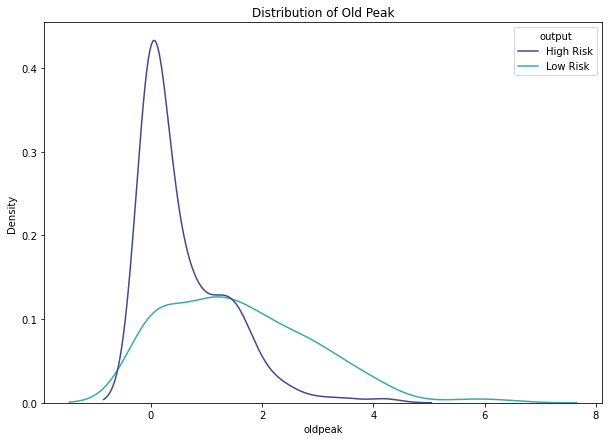

In [29]:
fig = plt.figure(figsize=(10,7))
sns.kdeplot(data = heart_df_eda, x = "oldpeak", hue = "output", palette="mako")
plt.title("Distribution of Old Peak")

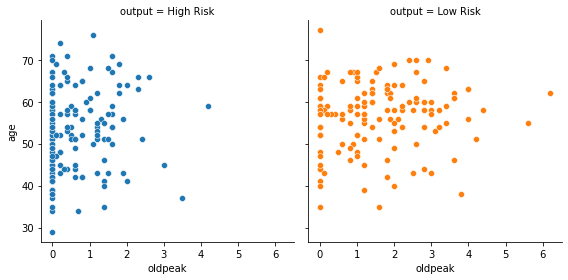

In [30]:
g = sns.FacetGrid(heart_df_eda, col="output", height = 4, hue = "output")
g.map(sns.scatterplot, "oldpeak", "age")

**Observation:** Patients between the ages 40 and 60 who have an old peak lower than 1 have a higher risk of heart attack.

#### Resting Blood Pressure Plots

Text(0.5, 1.0, 'Distribution of Resting BP')

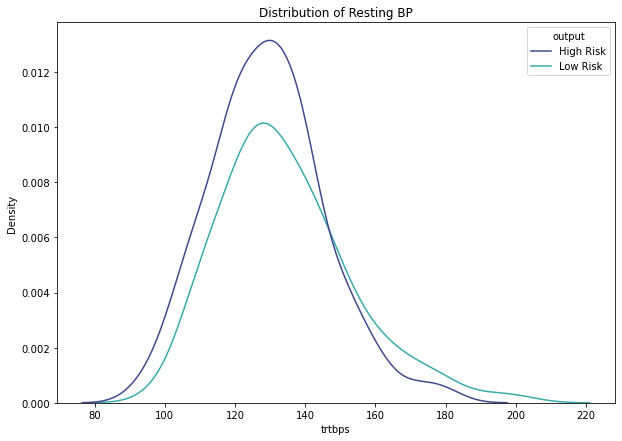

In [31]:
fig = plt.figure(figsize=(10,7))
sns.kdeplot(data = heart_df_eda, x = "trtbps", hue = "output", palette="mako")
plt.title("Distribution of Resting BP")

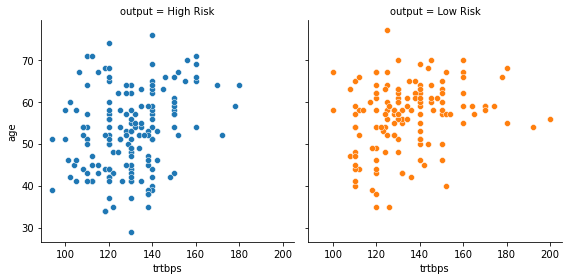

In [32]:
g = sns.FacetGrid(heart_df_eda, col="output", height = 4, hue = "output")
g.map(sns.scatterplot, "trtbps", "age")

**Observations:** Patients between 45 and 55 with a resting blood pressure between 120-140 may have a higher chance of heart attack.

#### Maximum Heart Rate Plots

Text(0.5, 1.0, 'Distribution of Maximum Heart Rate Achieved')

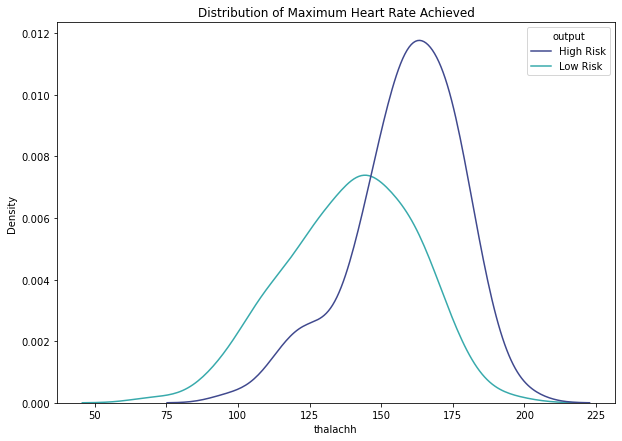

In [33]:
fig = plt.figure(figsize=(10,7))
sns.kdeplot(data = heart_df_eda, x = "thalachh", hue = "output", palette="mako")
plt.title("Distribution of Maximum Heart Rate Achieved")

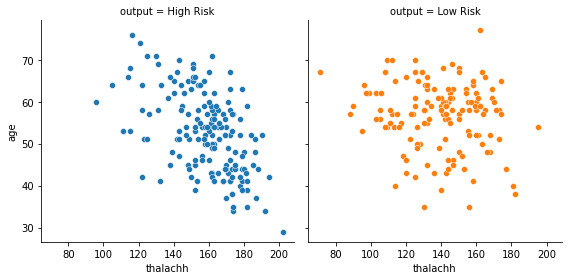

In [34]:
g = sns.FacetGrid(heart_df_eda, col="output", height = 4, hue = "output")
g.map(sns.scatterplot, "thalachh", "age")

**Observations:** Patients between 40 and 60 with a maximum heart rate (thalachh) above 150 have a higher chance of heart attack

#### Correlation between features

In [35]:
# Compute the correlation matrix
corr = heart_df.corr()

<AxesSubplot:>

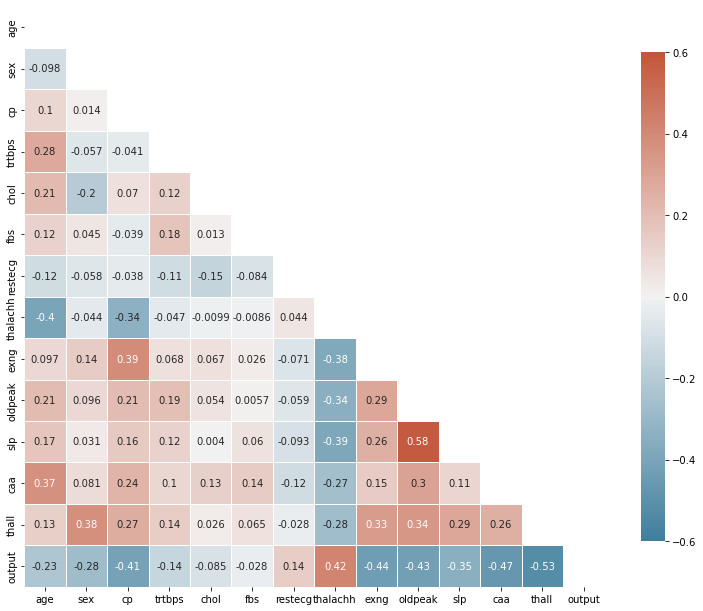

In [36]:
fig = plt.figure(figsize = (13, 12))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-0.6, vmax=0.6, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})

**Observation:** Having highly correlated data will increase the risk of error in our analysis. Some are moderately correlated like (oldpeak, slp), but none of the features are highly correlated. We can leave all the features in the dataset.  

### Feature Scaling

First we will split the data into a feature set and the target set. Then we will preprocess the features set before using it to train the model.

Distance-based algorithms like K-means and SVM (Support Vector Machines) are affected by the range of features since they calculate distances between data points to find similarity. For this reason, it is better to scale the features so that they can all contribute towards the output.  

*Citation: Reference #6*

In [37]:
#Split data into features and target sets
drop_columns = ["output"]
X = heart_df.drop(drop_columns, axis=1)
y = heart_df["output"]

In [38]:
from sklearn.preprocessing import MinMaxScaler

#Using a standard scaler to scale the features
scaler = MinMaxScaler()
X_std = scaler.fit_transform(X)
X_std =  pd.DataFrame(X_std, columns = X.columns)
X_std.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,1.0,0.0,0.75
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,1.0,0.0,0.00
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.0,0.0,0.00
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.0,0.0,0.00
4,0.583333,0.0,1.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.0,0.0,0.00


## Stage 2: Unsupervised Learning Model and Analysis

Clustering algorithms can get a meaningful insight about the structure of the data. It groups unlabelled data that share similar characteristics into different clusters. The datapoints within the clusters share some common attributes. Each cluster is independent of each other such that the datapoints between each cluster will not share some commonalities. These clusters can be used to find hidden patterns or trends and study new data.
 
For the unsupervised learning approach, we will use K-means clustering to analyze the features and predict the output variable.

### Implementing K-Means Clustering 

To find the optimal number of clusters, we will use the elbow method. The elbow method runs the k-means algorithm for a range of values of k features. Then we will plot the sum of squared distances of samples to their closest centroid. The optimal k value is where the curve sharply drops off.

*Citation: Reference #9, #10*

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn import metrics

In [40]:
#Using elbow method to find optimal k clusters.
elbow = []
for i in range(1, 14):
    kmeans_model = KMeans(init = "k-means++", n_clusters = i, random_state = 42, n_init = 10)
    kmeans_model.fit(X_std)
    elbow.append(kmeans_model.inertia_)

C:\Users\venuk\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


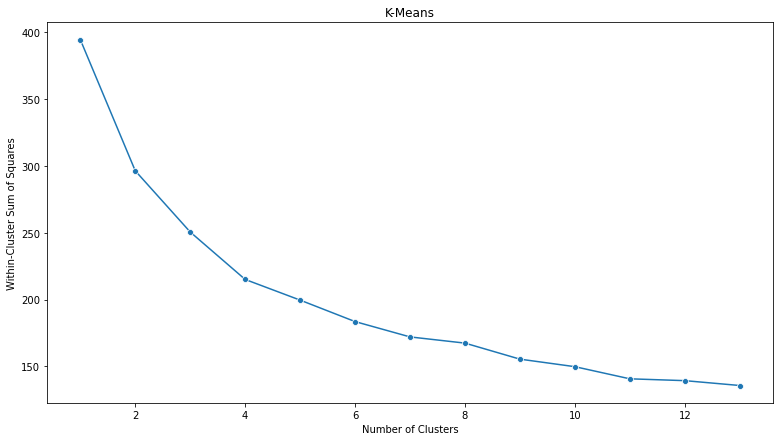

In [41]:
fig = plt.figure(figsize = (13, 7))
sns.lineplot(x = range(1, 14), y = elbow, marker = 'o')

plt.title('K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

The curve sharply drops at the value 2. We will implement k-means using this value. 

In [42]:
#Implementing K-means model with k = 2
kmeans_model = KMeans(init = "k-means++", n_clusters = 2, random_state = 10).fit(X_std)

#Training data and predicting output
yp_train = kmeans_model.predict(X_std)

#### Graphically Visualizing the Results

Let's compare how well our k-means algorithm predicted the labels of the dataset with the original output of the data. We will use the numerical features of the dataset since it is much easier to visualize.

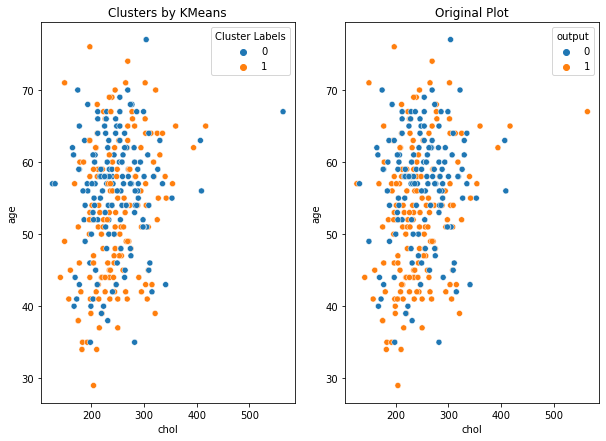

In [43]:
heart_df_km = heart_df.copy()

#Adding cluster labels column to original dataset
heart_df_km['Cluster Labels'] = kmeans_model.labels_

plt.figure(figsize = (10, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(x = heart_df_km['chol'], y = heart_df_km['age'], hue = heart_df_km['Cluster Labels'])
plt.title('Clusters by KMeans')

plt.subplot(1, 2, 2)
sns.scatterplot(x = heart_df['chol'], y = heart_df['age'], hue = heart_df['output'])
plt.title('Original Plot')
plt.show()

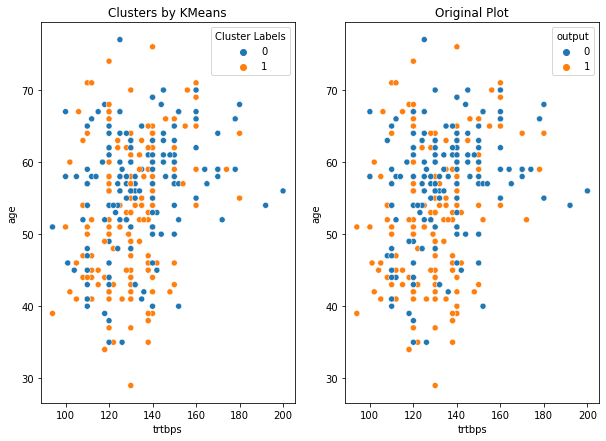

In [44]:
plt.figure(figsize = (10, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(x = heart_df_km['trtbps'], y = heart_df_km['age'], hue = heart_df_km['Cluster Labels'])
plt.title('Clusters by KMeans')

plt.subplot(1, 2, 2)
sns.scatterplot(x = heart_df['trtbps'], y = heart_df['age'], hue = heart_df['output'])
plt.title('Original Plot')
plt.show()

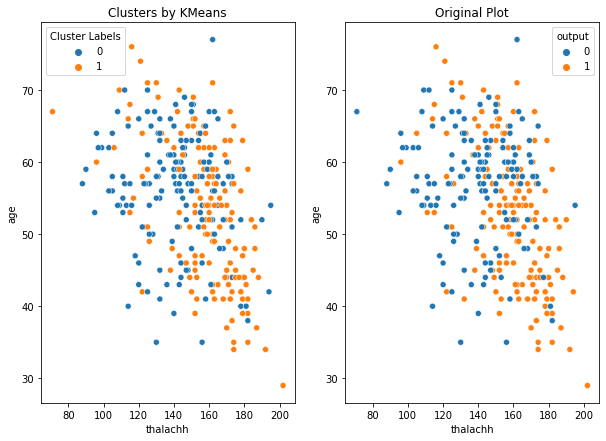

In [45]:
plt.figure(figsize = (10, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(x = heart_df_km['thalachh'], y = heart_df_km['age'], hue = heart_df_km['Cluster Labels'])
plt.title('Clusters by KMeans')

plt.subplot(1, 2, 2)
sns.scatterplot(x = heart_df['thalachh'], y = heart_df['age'], hue = heart_df['output'])
plt.title('Original Plot')
plt.show()

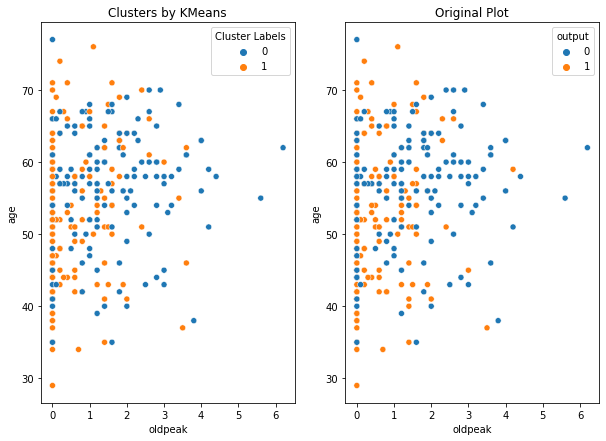

In [46]:
plt.figure(figsize = (10, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(x = heart_df_km['oldpeak'], y = heart_df_km['age'], hue = heart_df_km['Cluster Labels'])
plt.title('Clusters by KMeans')

plt.subplot(1, 2, 2)
sns.scatterplot(x = heart_df['oldpeak'], y = heart_df['age'], hue = heart_df['output'])
plt.title('Original Plot')
plt.show()

Visually, the k-means model predicts the labels pretty accurately. When we calculate the metrics used to evaluate the model performance, we see that it is approximately 80% accurate.

In [47]:
# accuracy: (tp + tn) / (p + n)
print("Accuracy: %0.3f" % metrics.accuracy_score(y, yp_train))

# precision: tp / (tp + fp)
print("Precision: %0.3f" % metrics.precision_score(y, yp_train))

# recall: tp / (tp + fn)
print("Recall: %0.3f" % metrics.recall_score(y, yp_train))

# f1: 2 tp / (2 tp + fp + fn)
print("F1 Score: %0.3f" % metrics.f1_score(y, yp_train))

Accuracy: 0.799
Precision: 0.833
Recall: 0.788
F1 Score: 0.810


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.20, random_state = 5)

In [49]:
#Implementing K-means model with k = 2
kmeans_model1 = KMeans(init = "k-means++", n_clusters = 2, random_state = 10)

#Training data and predicting output
ypred_train = kmeans_model1.fit_predict(X_train)

# accuracy: (tp + tn) / (p + n)
print("Accuracy: %0.3f" % metrics.accuracy_score(y_train, ypred_train))

# precision: tp / (tp + fp)
print("Precision: %0.3f" % metrics.precision_score(y_train, ypred_train))

# recall: tp / (tp + fn)
print("Recall: %0.3f" % metrics.recall_score(y_train, ypred_train))

# f1: 2 tp / (2 tp + fp + fn)
print("F1 Score: %0.3f" % metrics.f1_score(y_train, ypred_train))

Accuracy: 0.802
Precision: 0.841
Recall: 0.791
F1 Score: 0.815


In [50]:
#Predict test data labels
ypred_test = kmeans_model1.predict(X_test)

# accuracy: (tp + tn) / (p + n)
print("Accuracy: %0.3f" % metrics.accuracy_score(y_test, ypred_test))

# precision: tp / (tp + fp)
print("Precision: %0.3f" % metrics.precision_score(y_test, ypred_test))

# recall: tp / (tp + fn)
print("Recall: %0.3f" % metrics.recall_score(y_test, ypred_test))

# f1: 2 tp / (2 tp + fp + fn)
print("F1 Score: %0.3f" % metrics.f1_score(y_test, ypred_test))

Accuracy: 0.787
Precision: 0.800
Recall: 0.774
F1 Score: 0.787


**Analysis:** K-means Clustering has an accuracy of 79.9% when predicting on the known data (X_std). 

When we used 80% of the data for training, the accuracy on the training set was 80.2%. When we used the model to predict the test set, the accuracy was 78.7%

### Implementing K-Means Clustering using PCA

K-Means clustering algorithm is prone to the curse of dimensionality so we will use PCA to preprocess the data and see if the model performance improves.

First, let's find the optimum number of components for the PCA model.

*Citation: Reference #12, #13, #14*

In [51]:
## Implementing PCA model
pca_m = PCA()
pca_m.fit(X_std)

PCA()

Based on the cumulative explained variance plot, we can decide how many features to keep. We want to preserve atleast 80% of the variance, so we choose components based on that.

In [52]:
pca_m.explained_variance_ratio_

array([0.3079418 , 0.16267993, 0.11163672, 0.09828081, 0.07230634,
       0.06784373, 0.05278597, 0.04914989, 0.02519867, 0.0188606 ,
       0.01298186, 0.01163253, 0.00870117])

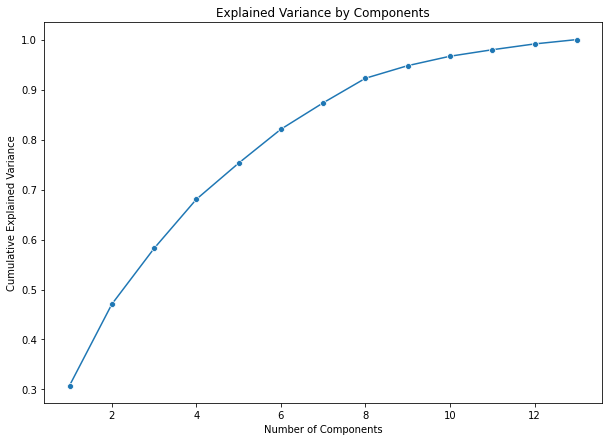

In [53]:
fig = plt.figure(figsize = (10, 7))
sns.lineplot(x = range(1, 14), y = pca_m.explained_variance_ratio_.cumsum(), marker = 'o')

plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

From the above plot, we can see that 80% of the variance can be explained by 6 components.

In [54]:
pca_m = PCA(n_components = 6)
pca_m.fit(X_std)

PCA(n_components=6)

In [55]:
pca_data = pca_m.transform(X_std)

In [56]:
#Implementing K-means model with k = 2 using reduced data
km_pca = KMeans(init = "k-means++", n_clusters = 2, random_state = 10).fit(X_std)

#Training model and predicting training data output
y_pred = km_pca.predict(X_std)

In [57]:
# accuracy: (tp + tn) / (p + n)
print("Accuracy: %0.3f" % metrics.accuracy_score(y, y_pred))

# precision: tp / (tp + fp)
print("Precision: %0.3f" % metrics.precision_score(y, y_pred))

# recall: tp / (tp + fn)
print("Recall: %0.3f" % metrics.recall_score(y, y_pred))

# f1: 2 tp / (2 tp + fp + fn)
print("F1 Score: %0.3f" % metrics.f1_score(y, y_pred))

Accuracy: 0.799
Precision: 0.833
Recall: 0.788
F1 Score: 0.810


#### Graphically Visualizing the Results

From the model performance evaluation metrics, we can see that applying PCA and K-means algorithm on the resulting data doesn't make much of a difference in accuracy than the above K-means model when predicting labels for the whole dataset. However, let's see a few graphical representations.

In [58]:
#Concatenating the dataset with pca_data
heart_df_pkm = pd.concat([heart_df, pd.DataFrame(pca_data)], axis = 1)
heart_df_pkm.columns.values[-6: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6']

#Adding cluster labels column
heart_df_pkm['Cluster Labels'] = km_pca.labels_

In [59]:
heart_df_pkm.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,...,caa,thall,output,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Cluster Labels
0,63,1,1,145,233,1,0,150,0,2.3,...,0,6,1,0.208028,-0.538589,0.789293,0.529485,-0.770020,0.621983,0
1,37,1,3,130,250,0,1,187,0,3.5,...,0,3,1,-0.242146,-0.280390,-0.183442,-0.072702,-0.239487,0.760996,1
2,41,0,2,130,204,0,0,172,0,1.4,...,0,3,1,-0.931869,0.197884,0.011863,-0.115239,-0.175658,-0.050580,1
3,56,1,2,120,236,0,1,178,0,0.8,...,0,3,1,-0.554187,-0.540114,-0.334683,0.062269,-0.032715,-0.000871,1
4,57,0,4,120,354,0,1,163,1,0.6,...,0,3,1,-0.284671,0.935250,-0.508783,0.067818,-0.043746,-0.428984,1


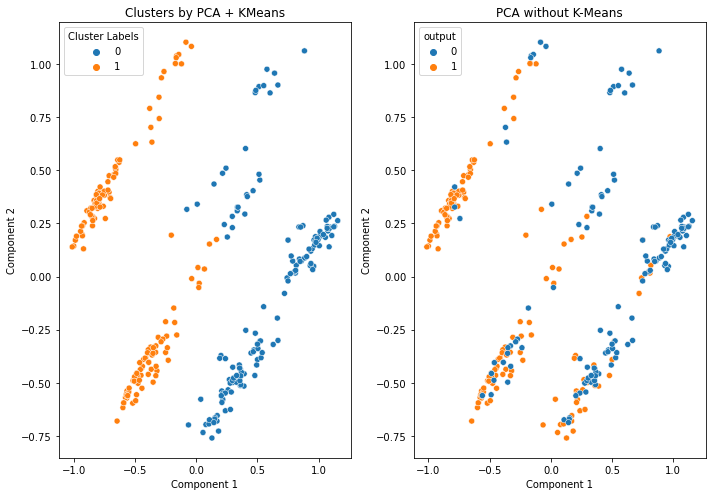

In [60]:
plt.figure(figsize = (10, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(x = heart_df_pkm['Component 1'], y = heart_df_pkm['Component 2'], hue = heart_df_pkm['Cluster Labels'])
plt.title('Clusters by PCA + KMeans')

plt.subplot(1, 2, 2)
sns.scatterplot(x = heart_df_pkm['Component 1'], y = heart_df_pkm['Component 2'], hue = heart_df_pkm['output'])
plt.title('PCA without K-Means')

plt.tight_layout()

plt.show()

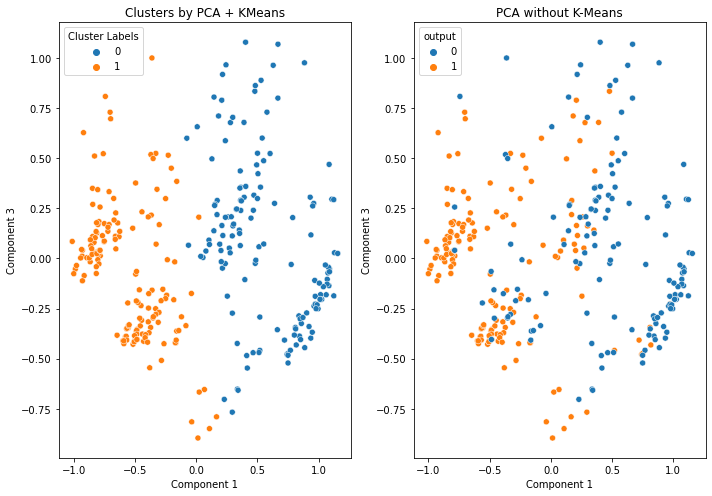

In [61]:
plt.figure(figsize = (10, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(x = heart_df_pkm['Component 1'], y = heart_df_pkm['Component 3'], hue = heart_df_pkm['Cluster Labels'])
plt.title('Clusters by PCA + KMeans')

plt.subplot(1, 2, 2)
sns.scatterplot(x = heart_df_pkm['Component 1'], y = heart_df_pkm['Component 3'], hue = heart_df_pkm['output'])
plt.title('PCA without K-Means')

plt.tight_layout()

plt.show()

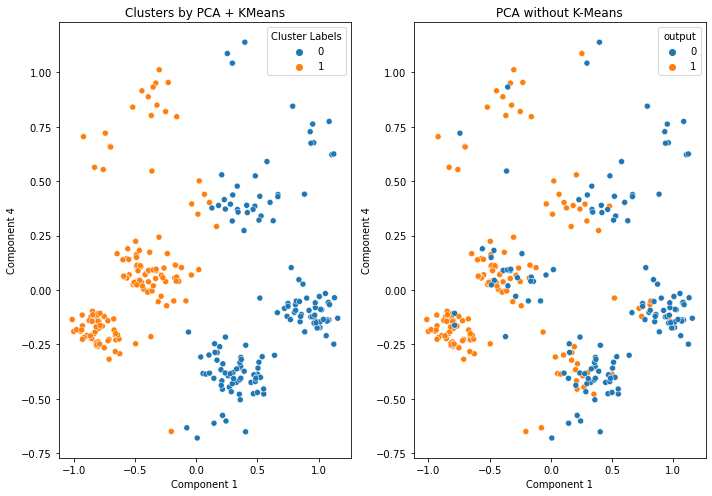

In [62]:
plt.figure(figsize = (10, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(x = heart_df_pkm['Component 1'], y = heart_df_pkm['Component 4'], hue = heart_df_pkm['Cluster Labels'])
plt.title('Clusters by PCA + KMeans')

plt.subplot(1, 2, 2)
sns.scatterplot(x = heart_df_pkm['Component 1'], y = heart_df_pkm['Component 4'], hue = heart_df_pkm['output'])
plt.title('PCA without K-Means')

plt.tight_layout()

plt.show()

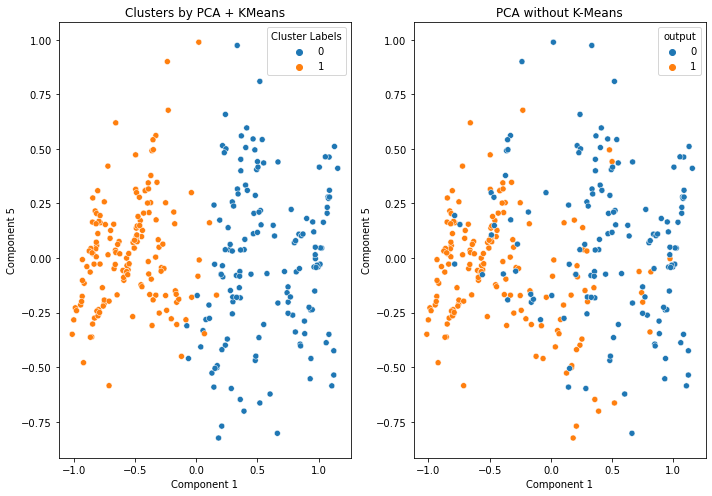

In [63]:
plt.figure(figsize = (10, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(x = heart_df_pkm['Component 1'], y = heart_df_pkm['Component 5'], hue = heart_df_pkm['Cluster Labels'])
plt.title('Clusters by PCA + KMeans')

plt.subplot(1, 2, 2)
sns.scatterplot(x = heart_df_pkm['Component 1'], y = heart_df_pkm['Component 5'], hue = heart_df_pkm['output'])
plt.title('PCA without K-Means')

plt.tight_layout()

plt.show()

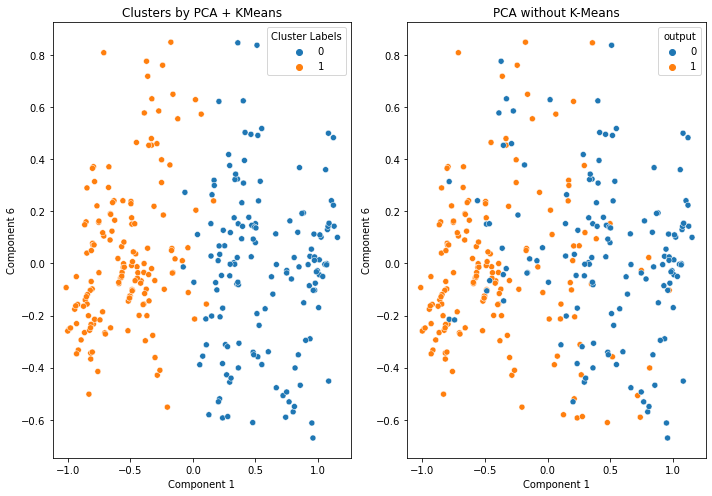

In [64]:
plt.figure(figsize = (10, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(x = heart_df_pkm['Component 1'], y = heart_df_pkm['Component 6'], hue = heart_df_pkm['Cluster Labels'])
plt.title('Clusters by PCA + KMeans')

plt.subplot(1, 2, 2)
sns.scatterplot(x = heart_df_pkm['Component 1'], y = heart_df_pkm['Component 6'], hue = heart_df_pkm['output'])
plt.title('PCA without K-Means')

plt.tight_layout()

plt.show()

We can clearly see how the clusters are formed when applying PCA on the data. When we only applied k-means algorithm on the data, the cluster formation wasn't too clear.

Let's see if using only 80% of the dataset will improve the model.

In [65]:
#Split into training and testing data
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(pca_data, y, test_size = 0.20, random_state = 10)

In [66]:
#Implementing K-means model with k = 2 using reduced data
kmeans_pca = KMeans(init = "k-means++", n_clusters = 2, random_state = 10)

#Training model and predicting training data output
yp_train_ = kmeans_pca.fit_predict(Xpca_train)

#Predicted training labels
train_pca_labels = kmeans_pca.labels_

In [67]:
# accuracy: (tp + tn) / (p + n)
print("Accuracy: %0.3f" % metrics.accuracy_score(ypca_train, yp_train_))

# precision: tp / (tp + fp)
print("Precision: %0.3f" % metrics.precision_score(ypca_train, yp_train_))

# recall: tp / (tp + fn)
print("Recall: %0.3f" % metrics.recall_score(ypca_train, yp_train_))

# f1: 2 tp / (2 tp + fp + fn)
print("F1 Score: %0.3f" % metrics.f1_score(ypca_train, yp_train_))

Accuracy: 0.781
Precision: 0.831
Recall: 0.777
F1 Score: 0.803


In [68]:
#Predicting test data output using the trained model
yp_test_ = kmeans_pca.predict(Xpca_test)

In [69]:
# accuracy: (tp + tn) / (p + n)
print("Accuracy: %0.3f" % metrics.accuracy_score(ypca_test, yp_test_))

# precision: tp / (tp + fp)
print("Precision: %0.3f" % metrics.precision_score(ypca_test, yp_test_))

# recall: tp / (tp + fn)
print("Recall: %0.3f" % metrics.recall_score(ypca_test, yp_test_))

# f1: 2 tp / (2 tp + fp + fn)
print("F1 Score: %0.3f" % metrics.f1_score(ypca_test, yp_test_))

Accuracy: 0.869
Precision: 0.875
Recall: 0.808
F1 Score: 0.840


**Analysis:** When training on the whole dataset the PCA + kmeans model and kmeans model perform the same. 

The differences between the two models show when we use 80% of the training data. When predicting on the train data, the accuracy for the kmeans model is 80.2%, while the accuracy for the PCA + kmeans model is 78.1%. When predicting the test data labels, the accuracy for the kmeans model is 78.7% and the accuracy for the PCA + kmeans model is 86.9%.

This means that the PCA + Kmeans model is able to predict more accurately for unknown data using 80% of training data.

In [70]:
acc_table = pd.DataFrame({'Model': ['K-Means (80% data)',
                                   'K-Means with PCA (80% data)'],
                         'Accuracy Score': [metrics.accuracy_score(y_test, ypred_test),
                                           metrics.accuracy_score(ypca_test, yp_test_)],
                         'Precision Score': [metrics.precision_score(y_test, ypred_test),
                                            metrics.precision_score(ypca_test, yp_test_)],
                         'Recall Score': [metrics.recall_score(y_test, ypred_test),
                                         metrics.recall_score(ypca_test, yp_test_)],
                         'F1 Score': [metrics.f1_score(y_test, ypred_test),
                                     metrics.f1_score(ypca_test, yp_test_)]})
acc_table.style.background_gradient(cmap='Blues')

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score
0,K-Means (80% data),0.786885,0.800000,0.774194,0.786885
1,K-Means with PCA (80% data),0.868852,0.875000,0.807692,0.840000


## Stage 3: Results and Comparision with Supervised Learning Model

In this stage, we're going to implement two supervised learning models and compare if they are able to predict labels better than the unsupervised models from above.

### Support Vector Machine

For the first supervised learning algorithm, we will use a support vector machine model. This is because it is also a distance based algorithm like the unsupervised K-Means model. 

Before implementing the SVM model, we need to preprocess the data a little so that it can be used for analysis. This is because SVM does not support categorical data. The categorical values need to be converted into binary values in order to be useful for the model training and predicting. We will use One-Hot Encoding for converting the data. The categories with binary values will be left alone. Then we will standardize the resulting dataset.

*Citation: Reference #15, #16*

In [71]:
#Separating feature variables from target variable
X_s = heart_df.drop("output", axis=1)
y_s = heart_df["output"]

In [72]:
X_s.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,1,145,233,1,0,150,0,2.3,3,0,6
1,37,1,3,130,250,0,1,187,0,3.5,3,0,3
2,41,0,2,130,204,0,0,172,0,1.4,1,0,3
3,56,1,2,120,236,0,1,178,0,0.8,1,0,3
4,57,0,4,120,354,0,1,163,1,0.6,1,0,3


From the above data description, we know that the categorical features with levels are cp, restecg, slp and thall.

In [73]:
X_en = pd.get_dummies(X, columns=['cp', 'restecg', 'slp', 'thall'])
X_en.head(5)

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,cp_1,...,cp_4,restecg_0,restecg_1,restecg_2,slp_1,slp_2,slp_3,thall_3,thall_6,thall_7
0,63,1,145,233,1,150,0,2.3,0,1,...,0,1,0,0,0,0,1,0,1,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,0,1,0,0,0,1,1,0,0
2,41,0,130,204,0,172,0,1.4,0,0,...,0,1,0,0,1,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,0,0,...,0,0,1,0,1,0,0,1,0,0
4,57,0,120,354,0,163,1,0.6,0,0,...,1,0,1,0,1,0,0,1,0,0


In [74]:
#Scaling data using the implemented MinMax Scaler
X_en_scaled = scaler.fit_transform(X_en)
X_en_scaled =  pd.DataFrame(X_en_scaled, columns = X_en.columns)
X_en_scaled.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,cp_1,...,cp_4,restecg_0,restecg_1,restecg_2,slp_1,slp_2,slp_3,thall_3,thall_6,thall_7
0,0.708333,1.0,0.481132,0.244292,1.0,0.603053,0.0,0.370968,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.885496,0.0,0.564516,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.770992,0.0,0.225806,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.816794,0.0,0.129032,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.702290,1.0,0.096774,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [75]:
#Splitting data 80:20 for training and testing
X_trn, X_tst, y_trn, y_tst = train_test_split(X_en_scaled, y_s, test_size = 0.2, random_state = 42)

Let's find the best hyperparameters for the SVM using GridSearchCV. We will then implement SVM using those results.

In [76]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay

param_grid = {'kernel': ['rbf'],
    'C': [1, 3, 5, 7]
}
grid_svc = GridSearchCV(estimator = SVC(random_state = 42), param_grid = param_grid, cv = 5)
grid_svc.fit(X_trn, y_trn)
grid_svc.best_params_

{'C': 3, 'kernel': 'rbf'}

In [77]:
#Predict using best parameters
yp_svm = grid_svc.predict(X_tst)

In [78]:
# accuracy: (tp + tn) / (p + n)
print("Accuracy: %0.3f" % metrics.accuracy_score(y_tst, yp_svm))

# precision: tp / (tp + fp)
print("Precision: %0.3f" % metrics.precision_score(y_tst, yp_svm))

# recall: tp / (tp + fn)
print("Recall: %0.3f" % metrics.recall_score(y_tst, yp_svm))

# f1: 2 tp / (2 tp + fp + fn)
print("F1 Score: %0.3f" % metrics.f1_score(y_tst, yp_svm))

Accuracy: 0.918
Precision: 0.909
Recall: 0.938
F1 Score: 0.923


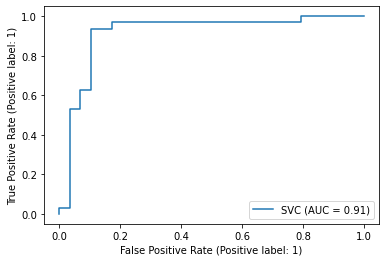

In [79]:
svc_disp = RocCurveDisplay.from_estimator(grid_svc, X_tst, y_tst, name = "SVC")
plt.show()

**Analysis:** The SVM model predicts the labels of the test set pretty well. The accuracy of the SVM model is 91.8% which is much better than the PCA + Kmeans model which had the highest accuracy for unsupervised model.

### SVM with PCA

There's alot of features after One-Hot-Encoding the categorical variables. Let's use PCA to reduce the dimensiona and model the resulting data with the SVM model.

In [80]:
## Implementing PCA model and repeating the same steps as we did for K-means
pca_m1 = PCA()
pca_m1.fit(X_en_scaled)

pca_m1.explained_variance_ratio_

array([2.65700745e-01, 1.58608218e-01, 1.19345594e-01, 9.73315441e-02,
       6.64266292e-02, 5.45929726e-02, 4.43410114e-02, 4.35496906e-02,
       3.39739928e-02, 2.79923959e-02, 2.64387902e-02, 2.34879616e-02,
       1.06202570e-02, 7.57683360e-03, 6.42480307e-03, 5.20949644e-03,
       4.75841585e-03, 3.62064869e-03, 4.17425219e-33, 3.45248078e-33,
       1.97254560e-33, 1.08948812e-33])

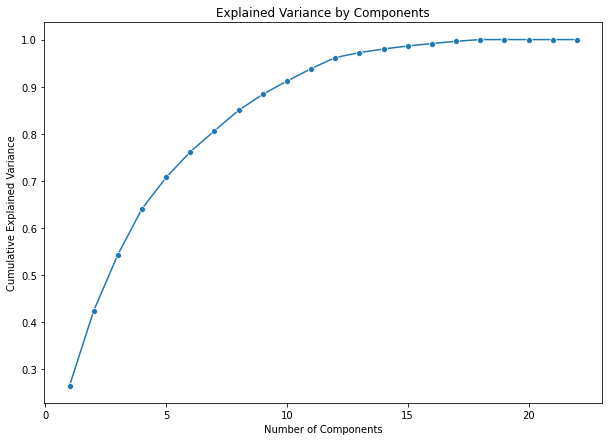

In [81]:
fig = plt.figure(figsize = (10, 7))
sns.lineplot(x = range(1, 23), y = pca_m1.explained_variance_ratio_.cumsum(), marker = 'o')

plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Out of 22 components, 7 components can explain 80% of the variance.

In [82]:
#Using the number of components that explain atleast 80% of the variance
pca_m1 = PCA(n_components = 0.80)
pca_m1.fit(X_en_scaled)

pca_m1.n_components_

7

In [83]:
pca_data1 = pca_m1.transform(X_en_scaled)

In [84]:
#Split into training and testing data
Xpc_trn, Xpc_tst, ypc_trn, ypc_tst = train_test_split(pca_data1, y_s, test_size = 0.20, random_state = 42)

In [85]:
#Finding best parameters for SVM using the above param_grid
grid_svc1 = GridSearchCV(estimator = SVC(), param_grid = param_grid, cv = 5)
grid_svc1.fit(Xpc_trn, ypc_trn)
grid_svc1.best_params_

{'C': 1, 'kernel': 'rbf'}

In [86]:
#Predict using best parameters
yp_svm1 = grid_svc1.predict(Xpc_tst)

In [87]:
# accuracy: (tp + tn) / (p + n)
print("Accuracy: %0.3f" % metrics.accuracy_score(ypc_tst, yp_svm1))

# precision: tp / (tp + fp)
print("Precision: %0.3f" % metrics.precision_score(ypc_tst, yp_svm1))

# recall: tp / (tp + fn)
print("Recall: %0.3f" % metrics.recall_score(ypc_tst, yp_svm1))

# f1: 2 tp / (2 tp + fp + fn)
print("F1 Score: %0.3f" % metrics.f1_score(ypc_tst, yp_svm1))

Accuracy: 0.852
Precision: 0.926
Recall: 0.781
F1 Score: 0.847


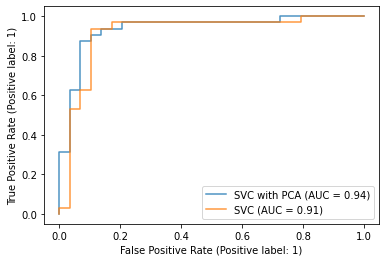

In [88]:
ax = plt.gca()
svc1_disp = RocCurveDisplay.from_estimator(grid_svc1, Xpc_tst, ypc_tst, ax=ax, alpha=0.8, name = 'SVC with PCA')
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

**Analysis:** The accuracy of the model decreases when using PCA. This might mean that our model is overfitting the train data. 

### Random Forest Classifier

For our second supervised learning model, we will use a tree-based algorithm, Random Forest Classifier. We will directly implement the features set in the algorithm. Feature scaling isn't really required for tree-based algorithms, since the split of nodes on a feature is independent of other features.

Let's see if a tree-based algorithm can achieve more accuracy than the other models.

In [89]:
from sklearn.ensemble import RandomForestClassifier 

In [90]:
X_rftrn, X_rftst, y_rftrn, y_rftst = train_test_split(X_s, y_s, test_size = 0.20, random_state = 42)

In [91]:
rf_param_grid = {'criterion': ['entropy'],
                 'n_estimators': [100, 200],
                 'max_depth': [5, 10, 15, 20]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5)
rf_grid.fit(X_rftrn, y_rftrn)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['entropy'], 'max_depth': [5, 10, 15, 20],
                         'n_estimators': [100, 200]})

In [92]:
rf_grid.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 200}

In [93]:
yp_rf = rf_grid.predict(X_rftst)

In [94]:
# accuracy: (tp + tn) / (p + n)
print("Accuracy: %0.3f" % metrics.accuracy_score(y_rftst, yp_rf))

# precision: tp / (tp + fp)
print("Precision: %0.3f" % metrics.precision_score(y_rftst, yp_rf))

# recall: tp / (tp + fn)
print("Recall: %0.3f" % metrics.recall_score(y_rftst, yp_rf))

# f1: 2 tp / (2 tp + fp + fn)
print("F1 Score: %0.3f" % metrics.f1_score(y_rftst, yp_rf))

Accuracy: 0.869
Precision: 0.853
Recall: 0.906
F1 Score: 0.879


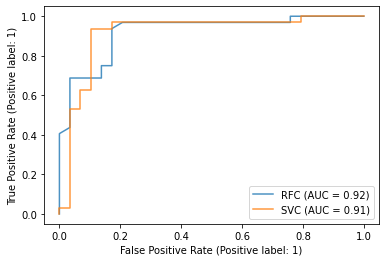

In [95]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rf_grid, X_rftst, y_rftst, ax=ax, alpha=0.8, name = 'RFC')
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

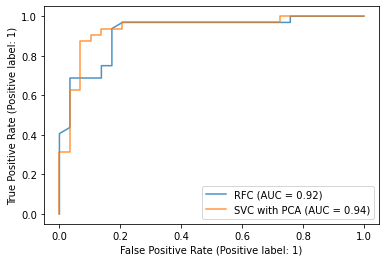

In [96]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rf_grid, X_rftst, y_rftst, ax=ax, alpha=0.8, name = 'RFC')
svc1_disp.plot(ax=ax, alpha=0.8)
plt.show()

### Results

In [97]:
acc_table = pd.DataFrame({'Model': ['K-Means',
                                   'K-Means with PCA',
                                   'SVC',
                                   'SVC with PCA',
                                   'Random Forest Tree'],
                         'Accuracy Score': [metrics.accuracy_score(y_test, ypred_test),
                                           metrics.accuracy_score(ypca_test, yp_test_),
                                           metrics.accuracy_score(y_tst, yp_svm),
                                           metrics.accuracy_score(ypc_tst, yp_svm1),
                                           metrics.accuracy_score(y_rftst, yp_rf)],
                         'Precision Score': [metrics.precision_score(y_test, ypred_test),
                                            metrics.precision_score(ypca_test, yp_test_),
                                            metrics.precision_score(y_tst, yp_svm),
                                            metrics.precision_score(ypc_tst, yp_svm1),
                                            metrics.precision_score(y_rftst, yp_rf)],
                         'Recall Score': [metrics.recall_score(y_test, ypred_test),
                                         metrics.recall_score(ypca_test, yp_test_),
                                         metrics.recall_score(y_tst, yp_svm),
                                         metrics.recall_score(ypc_tst, yp_svm1),
                                         metrics.recall_score(y_rftst, yp_rf)],
                         'F1 Score': [metrics.f1_score(y_test, ypred_test),
                                     metrics.f1_score(ypca_test, yp_test_),
                                     metrics.f1_score(y_tst, yp_svm),
                                     metrics.f1_score(ypc_tst, yp_svm1),
                                     metrics.f1_score(y_rftst, yp_rf)]})
acc_table.style.background_gradient(cmap='Blues').set_caption("Model Evaluation Table")

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score
0,K-Means,0.786885,0.800000,0.774194,0.786885
1,K-Means with PCA,0.868852,0.875000,0.807692,0.840000
2,SVC,0.918033,0.909091,0.937500,0.923077
3,SVC with PCA,0.852459,0.925926,0.781250,0.847458
4,Random Forest Tree,0.868852,0.852941,0.906250,0.878788


From the table above, we can see the SVC classifier has the best performance among all the models. 

## Stage 4: Conclusions

In this project, we used the heart attack dataset to analyze whether a patient has a high or low risk of getting a heart attack based on various factors.

In the first stage, we cleaned the data by replacing the null values and re-labeling the data. Then we visually explored the data to find patterns and trends. We found that a few features such as chest pain type, slope, old peak and maximum heart achieved can greatly affect the outcome of having a high risk of heart attack. Before proceeding to the next stage, we standardized the data so that all features (both numerical and categorical) can contribute equally towards the results in analysis.

In the second stage, we used an unsupervised learning approach called K-means clustering. This algorithm clusters the datapoints into different groups using a similarity measure. By using the elbow method, we found that the optimal number of k-clusters was 2. Training the K-Means model using k=2 on the unlabeled training data, we achieved an accuracy of 79.9%. When using 80% of the the training data, the kmeans model was able to predict labels of the test data with an accuracy of 78.7%. The Kmeans algorithm suffers from the curse of dimensionality. To reduce the dimensions of the data, we implemented the PCA algorithm on the whole unlabeled training data. The model performance didn't improve from the previous kmeans model. When testing the PCA + kmeans model on 80% of the training data, the model performance improved as it was able to predict 86.9% of the test labels accurately. So the PCA + kmeans model is more data efficient as it only required 80% of the training data to achieve this accuracy.

In the third stage, we used two supervised learning approaches to compare with the unsupervised approach. The first model we chose is the SVM model since it also uses distance-based algorithms. We had to preprocess the data by encoding the categorical labels that had levels to binary variables and standardizing it. This is because SVM cannot handle categorical variables properly and it might be biased towards one feature if we don't encode the categorical labels. Although the number of features increased, it would help the SVM model treat all features equally. We trained the SVM model using 80% of the data and it was able to accurately predict 91.8% of the test labels correctly. Then we tried to improve the model by reducing the dimensionality of the data by applying PCA. However, this did not improve the SVM model. Instead it lowered the model performance, making it only 85.2% accurate when predicting the test labels. The second model we used was a classifier using a tree-based algorithm called the Random Forest Classifier. It did not require any preprocessing of data so we trained the model using 80% of the original training data. This model achieved an accuracy of 86.9%

In conclusion, the SVM model without any dimensionality reduction was the best performing model. The K-Means models did well, but probably needs more data to train on so that it can improve it's performance. Unsupervised learning algorithms are trained on unlabelled data and need lots of data in order to identify patterns and trends and the accurately classify the unknown data. 

## References

1. https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/discussion/234843#1459862
2. http://rstudio-pubs-static.s3.amazonaws.com/24341_184a58191486470cab97acdbbfe78ed5.html
3. https://towardsdatascience.com/heart-disease-risk-assessment-using-machine-learning-83335d077dad
4. https://www.mayoclinic.org/diseases-conditions/coronary-artery-disease/symptoms-causes/syc-20350613#:~:text=CAD%20happens%20when%20coronary%20arteries,or%20even%20a%20heart%20attack.
5. https://www.cdc.gov/heartdisease/facts.htm
6. https://www.kaggle.com/code/durgancegaur/a-guide-to-any-classification-problem#2.-Feature-Scaling
7. https://medium.com/@michellibelly/k-means-clustering-for-analysis-of-heart-disease-c2c6f75927e0
8. https://rpubs.com/AnjolaOlatunbosun/clusteringtechnique
9. https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/
10. https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
11. https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d
12. https://towardsdatascience.com/how-to-select-the-best-number-of-principal-components-for-the-dataset-287e64b14c6d
13. https://medium.com/more-python-less-problems/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2
14. https://365datascience.com/tutorials/python-tutorials/pca-k-means/
15. https://sebastianraschka.com/faq/docs/svm_for_categorical_data.html
16. https://github.com/kr-aashish/Heart-disease-prediction-using-SVM/blob/master/support_vector_machines_teacher.ipynb